In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import os
%pylab inline
figsize(12, 8)

Populating the interactive namespace from numpy and matplotlib


In [21]:
def massage_data(run):
    # Change time into time values
    run.linuxtime = run.linuxtime.apply(datetime.datetime.fromtimestamp)
    
    run.set_index(run.linuxtime, drop=True, inplace=True)
    del run["linuxtime"]
    for col in run:
        run[col].index = run.index
        
    # Get rid of some nonsense
    run.rpm = run.rpm.apply(lambda x: x if x < 5000 else np.nan)
    
    # Interpolate what we can
    run.interpolate(method='time')
    
    # Fill forward for other values
    run.fillna(method='pad', inplace=True)
    # fill backward for initial values
    run.fillna(method='bfill', inplace=True)

    return run

In [22]:
run = pd.read_csv("test_logs/2016-07-01_run9.csv")
run = run.append(pd.read_csv("test_logs/2016-07-01_run10.csv"))
run = massage_data(run)
run.time = run.time.apply(datetime.datetime.fromtimestamp)

# Shutdown Sequence

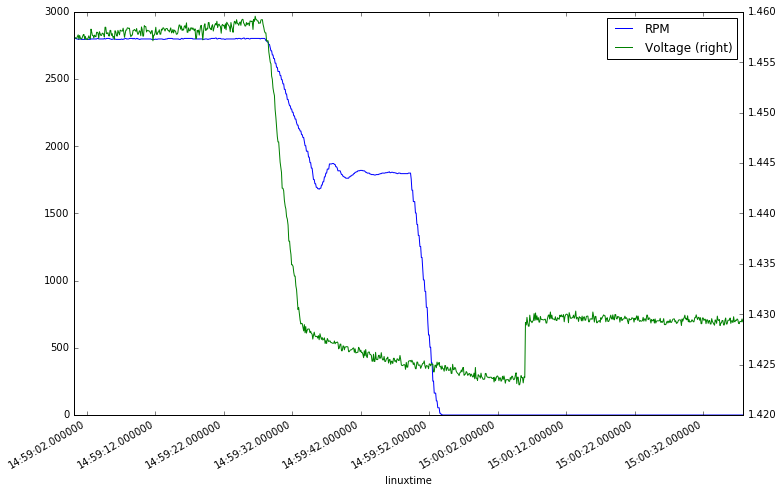

In [25]:
end = run["2016-07-01 14:59":"2016-07-01 15:00"]
end.rpm.plot(label="RPM", legend=True)
end.an_volt.plot(label="Voltage", legend=True, secondary_y=True)

# Full Charge Cycle

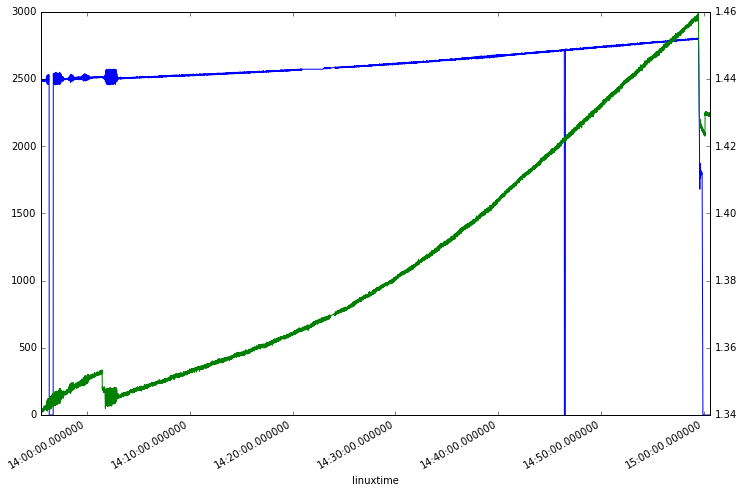

In [27]:
run.rpm.plot(label="RPM")
run.an_volt.plot(secondary_y=True)